<a href="https://colab.research.google.com/github/Sheikh-JamirAlam/heart-failure-prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df['RestingBP'] = df['RestingBP'].replace(0,df['RestingBP'].median())
df['Cholesterol'] = df['Cholesterol'].replace(0,df['Cholesterol'].median())

In [ ]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,238.000000,0.107317,148.151220,0.408049
1,55.899606,134.440945,242.665354,0.334646,127.655512,1.274213


<Axes: xlabel='HeartDisease', ylabel='count'>

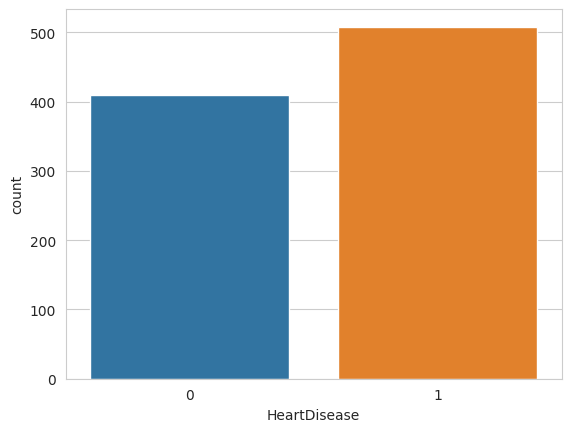

In [ ]:
sns.countplot(x=df['HeartDisease'])

Text(0.5, 1.0, 'Sex v/s HeartDisease\n')

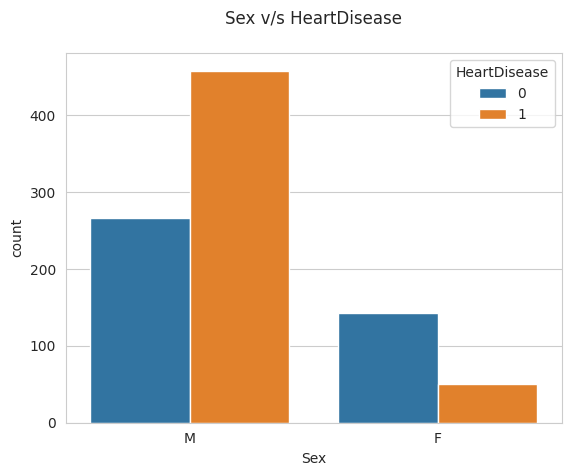

In [ ]:
sns.countplot(data= df, x='Sex',hue='HeartDisease')
plt.title('Sex v/s HeartDisease\n')

Text(0.5, 1.0, 'ChestPainType v/s HeartDisease\n')

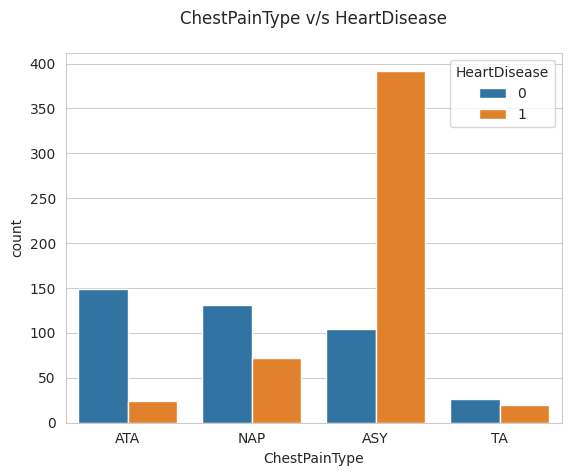

In [ ]:
sns.countplot(data= df, x='ChestPainType',hue='HeartDisease')
plt.title('ChestPainType v/s HeartDisease\n')

Text(0.5, 1.0, 'ST_Slope v/s HeartDisease\n')

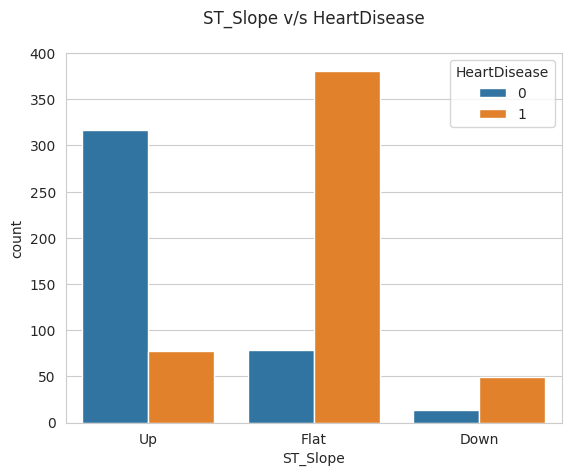

In [ ]:
sns.countplot(data= df, x='ST_Slope',hue='HeartDisease')
plt.title('ST_Slope v/s HeartDisease\n')

Text(0.5, 1.0, 'RestingECG v/s HeartDisease\n')

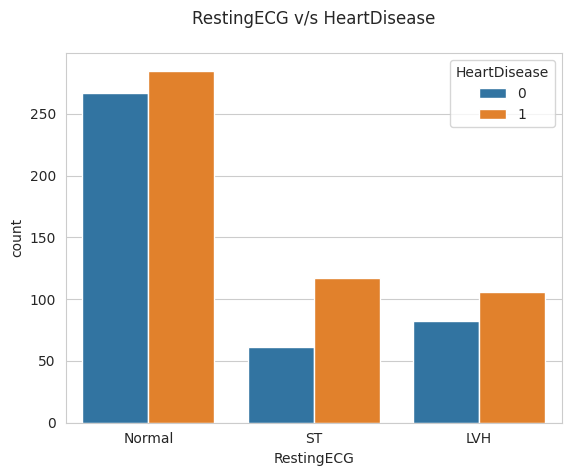

In [ ]:
sns.countplot(data= df, x='RestingECG',hue='HeartDisease')
plt.title('RestingECG v/s HeartDisease\n')

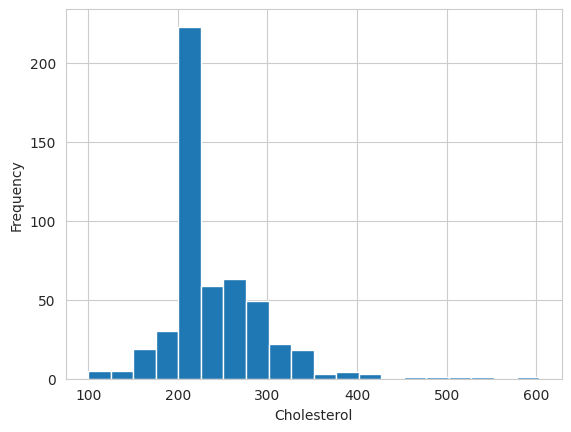

In [ ]:
plt.hist(df[df['HeartDisease'] == 1]['Cholesterol'], bins=20)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

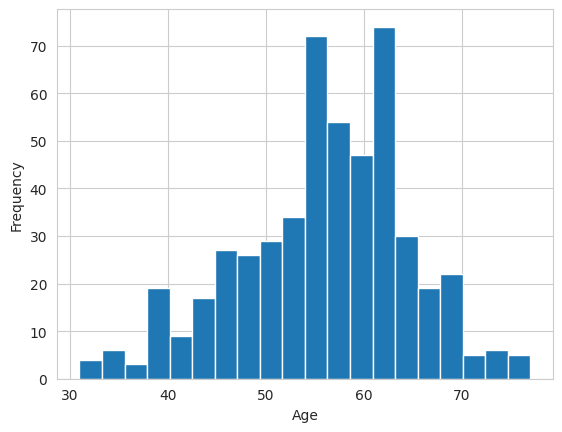

In [ ]:
plt.hist(df[df['HeartDisease'] == 1]['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

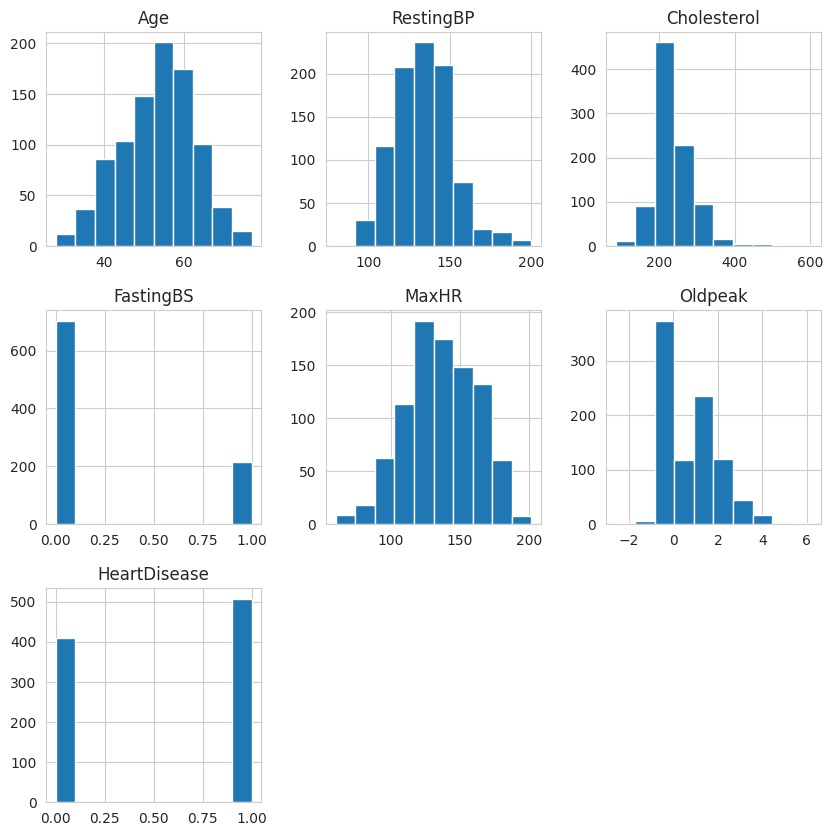

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='Oldpeak'>

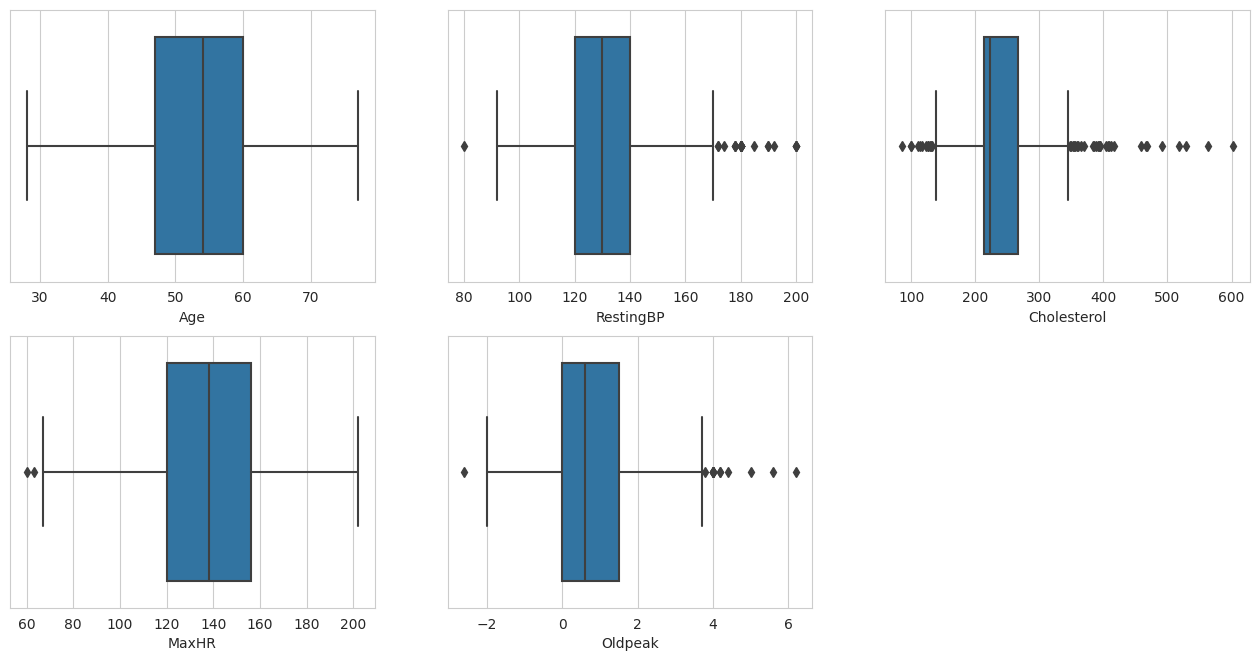

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='RestingBP',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Cholesterol',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='MaxHR',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Oldpeak',data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
le_chestPainType = LabelEncoder()
df['ChestPainType'] = le_chestPainType.fit_transform(df['ChestPainType'])
le_restingECG = LabelEncoder()
df['RestingECG'] = le_restingECG.fit_transform(df['RestingECG'])
le_exerciseAngina = LabelEncoder()
df['ExerciseAngina'] = le_exerciseAngina.fit_transform(df['ExerciseAngina'])
le_st_Slope = LabelEncoder()
df['ST_Slope'] = le_st_Slope.fit_transform(df['ST_Slope'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<Axes: >

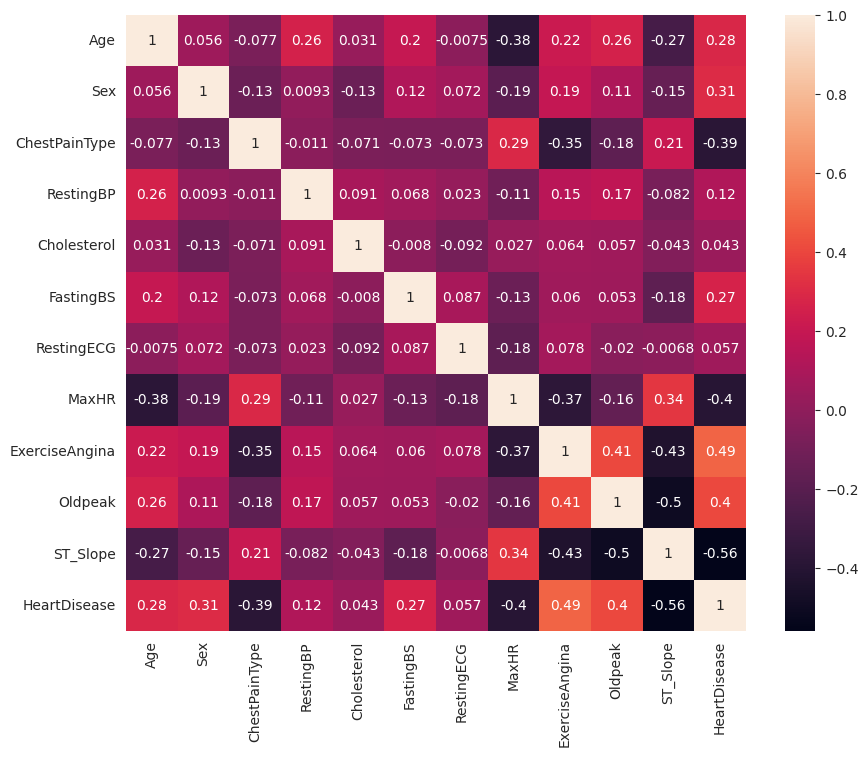

In [ ]:
corrmat=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True)

In [ ]:
df_selected = df.drop(['Oldpeak','RestingECG','Cholesterol'],axis='columns')
df_selected.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,1,1,140,0,172,0,2,0
1,49,0,2,160,0,156,0,1,1
2,37,1,1,130,0,98,0,2,0
3,48,0,0,138,0,108,1,1,1
4,54,1,2,150,0,122,0,2,0


In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Age', 'Sex','ChestPainType','RestingBP','FastingBS','MaxHR','ExerciseAngina','ST_Slope','HeartDisease']
df_new.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,0.093784,1.0,0.634678,0.702290,0.0,0.912214,0.0,1.000000,0.0
1,0.304798,0.0,0.839149,0.926390,0.0,0.754089,0.0,0.318975,1.0
2,0.046347,1.0,0.634678,0.472192,0.0,0.064340,0.0,1.000000,0.0
3,0.276990,0.0,0.000000,0.629226,0.0,0.125954,1.0,0.318975,1.0
4,0.484733,1.0,0.839149,0.842421,0.0,0.300436,0.0,1.000000,0.0


<Axes: xlabel='MaxHR'>

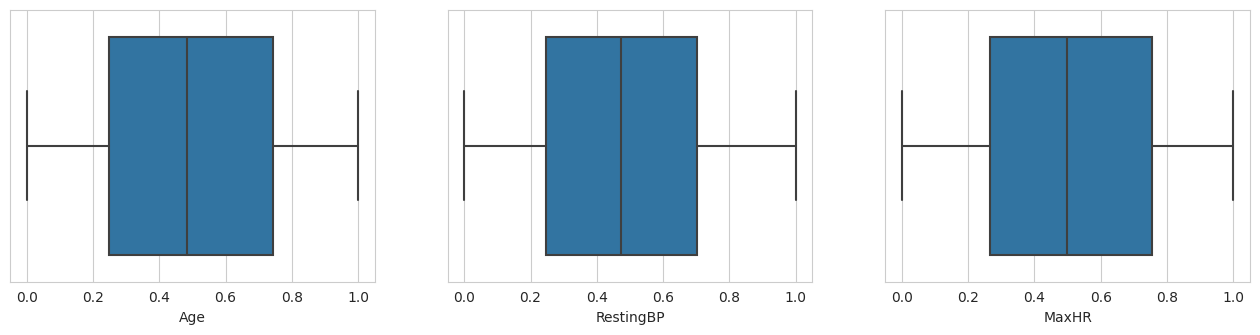

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['RestingBP'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['MaxHR'],data=df_new)

In [ ]:
target_name='HeartDisease'
y= df_new[target_name]
X=df_new.drop(target_name,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape,y_train.shape

((734, 8), (734,))

In [ ]:
X_test.shape,y_test.shape

((184, 8), (184,))

# 1. Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train,y_train)
best_model.score(X_test,y_test)

0.8609865470852017

In [ ]:
knn_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.74      0.79        77
         1.0       0.83      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184


 F1:
 0.8609865470852017

 Precision score is:
 0.8275862068965517

 Recall score is:
 0.897196261682243

 Confusion Matrix:



<Axes: >

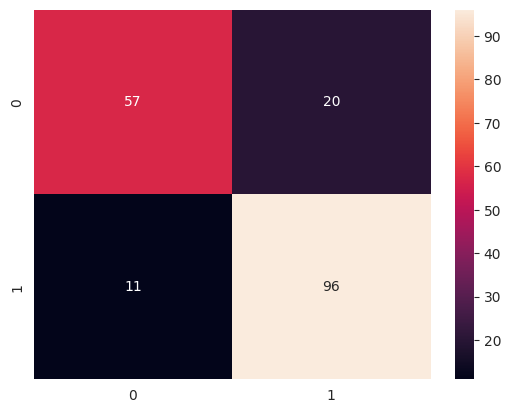

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True)

# 2. Using Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.78      0.80        77
         1.0       0.85      0.88      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184


 F1:
 0.8623853211009174

 Precision score is:
 0.8468468468468469

 Recall score is:
 0.8785046728971962

 Confusion Matrix:



<Axes: >

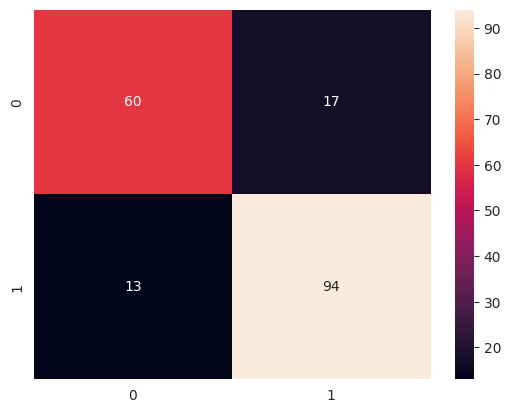

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred), annot=True)

# 3. Using SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
grid_result = grid_search.fit(X, y)
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.75      0.79        77
         1.0       0.83      0.89      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184


 F1:
 0.8609865470852017

 Precision score is:
 0.8275862068965517

 Recall score is:
 0.897196261682243

 Confusion Matrix:



<Axes: >

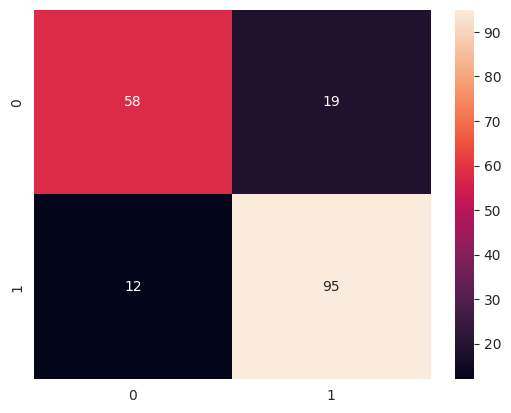

In [ ]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True)

# 4. Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
best_model=grid_search.fit(X_train, y_train)
dt_pred=best_model.predict(X_test)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.77      0.74      0.75        77
         1.0       0.82      0.84      0.83       107

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184


 F1:
 0.8294930875576038

 Precision score is:
 0.8181818181818182

 Recall score is:
 0.8411214953271028

 Confusion Matrix:



<Axes: >

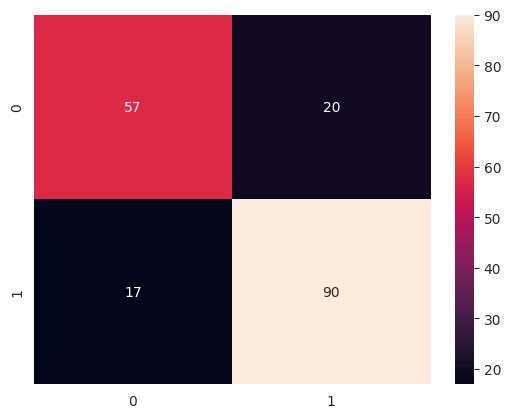

In [ ]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)

# 5. Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [ ]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train, y_train)
rf_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.79      0.80        77
         1.0       0.85      0.86      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184


 F1:
 0.8609865470852017

 Precision score is:
 0.8275862068965517

 Recall score is:
 0.897196261682243

 Confusion Matrix:



<Axes: >

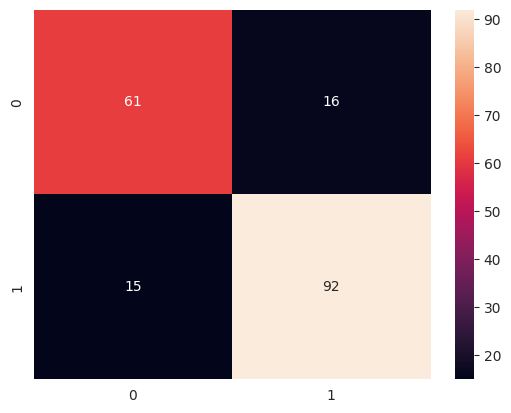

In [ ]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True)

# 6. Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.75      0.79        77
         1.0       0.83      0.89      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184


 F1:
 0.8597285067873303

 Precision score is:
 0.8333333333333334

 Recall score is:
 0.8878504672897196

 Confusion Matrix:



<Axes: >

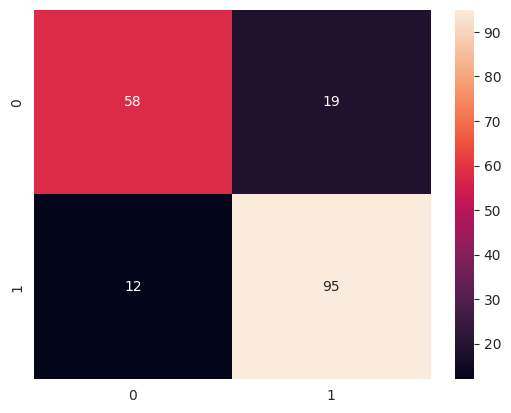

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True)